In [2]:
import pandas as pd
import numpy as np
import dtale
from sklearn.metrics import accuracy_score

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Issues with training and validation sets

I'm now learning about validation sets, and realising that what I've done in this notebook uses the test set for model comparison. I need to start again ... although there's plenty of useful stuff in here.

In [4]:
%matplotlib inline

In [5]:
dataset = pd.read_csv('./cleaned_dataset.csv')

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [7]:
X = dataset.drop(columns=['outcome','link'])
y = dataset.outcome

In [8]:
X.columns

Index(['season', 'capacity', 'elo_home', 'elo_away', 'home_newly_promoted',
       'home_newly_relegated', 'away_newly_promoted', 'away_newly_relegated',
       'home_goals_f_cum', 'home_goals_a_cum', 'away_goals_a_cum',
       'away_goals_f_cum', 'home_streak', 'away_streak'],
      dtype='object')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

In [10]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(max_iter=500).fit(X_train, y_train)

In [11]:
mlpc.score(X_test, y_test)

0.7043532879161231

In [12]:
mlpc.score(X_train, y_train)

0.7061289075711455

In [13]:
y_pred = mlpc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 213,  693,  946,   66],
       [  32, 2001, 1846,  119],
       [  36, 1045, 8419,   39],
       [  20,  821,  456, 3945]])

In [14]:
mlpc.predict_proba(X_test[:5]), y_test[:5]

(array([[0.15720267, 0.37806229, 0.2082086 , 0.25652644],
        [0.16938391, 0.36123404, 0.30297528, 0.16640677],
        [0.3413304 , 0.25590536, 0.38134166, 0.02142258],
        [0.11922214, 0.37492079, 0.22205454, 0.28380254],
        [0.10526909, 0.18372489, 0.68355336, 0.02745267]]),
 17168    2
 85940    2
 8965     3
 72253    3
 2186     3
 Name: outcome, dtype: int64)

### k-fold cross-validation

In [15]:
import numpy as np
from sklearn.model_selection import KFold

In [16]:
# huh? dunno what's going on here

# kf = KFold(n_splits=5)
# for train_index, test_index in kf.split(X):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     kf_mlpc = MLPClassifier(max_iter=500).fit(X_train, y_train)
#     print(kf_mlpc.score(X_test, y_test))

## try it without promotion / relegation features:

In [17]:
X_slim = X.drop(columns=['home_newly_relegated','away_newly_relegated','home_newly_promoted','away_newly_promoted','capacity','season','home_goals_a_cum','home_goals_f_cum','away_goals_f_cum','away_goals_a_cum'])
X_slim.columns

Index(['elo_home', 'elo_away', 'home_streak', 'away_streak'], dtype='object')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_slim, y, test_size = 0.2, shuffle=True)
mlpc_slim = MLPClassifier(max_iter=500).fit(X_train, y_train)

In [19]:
mlpc_slim.score(X_test, y_test)

0.6327003913610668

In [45]:
# Brighton v Norwich 2/4/22
mlpc_slim.predict([[1698.68762207, 1598.51208496, -6, -6]])

array([3])

## Random forest

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)
X.columns

Index(['season', 'capacity', 'elo_home', 'elo_away', 'home_newly_promoted',
       'home_newly_relegated', 'away_newly_promoted', 'away_newly_relegated',
       'home_goals_f_cum', 'home_goals_a_cum', 'away_goals_a_cum',
       'away_goals_f_cum', 'home_streak', 'away_streak'],
      dtype='object')

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(max_depth=20).fit(X_train, y_train)
rfcl.score(X_test, y_test)

0.696042904768807

In [22]:
# feature importances
rfcl.feature_importances_

array([0.02677826, 0.03375732, 0.03312263, 0.03641908, 0.00347095,
       0.00164594, 0.00335595, 0.00163627, 0.06116146, 0.0613698 ,
       0.06498241, 0.05852521, 0.32027174, 0.29350298])

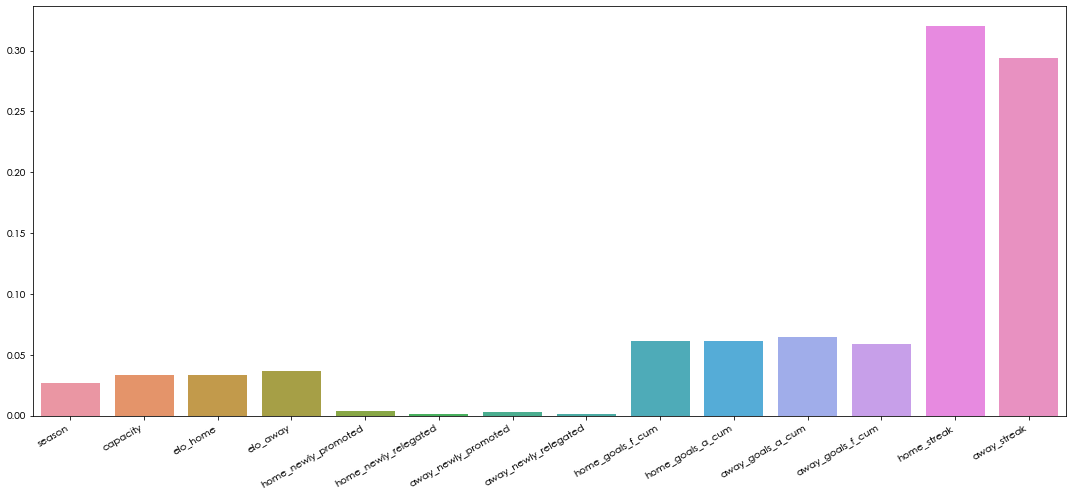

In [23]:
ax, fig = plt.subplots(figsize=[15,7])
sns.barplot(X.columns, rfcl.feature_importances_)
plt.xticks(rotation=30, horizontalalignment='right')
plt.tight_layout()

## Random Forest with just home/away streak, cumulative goals, and ELOs

In [41]:
X_streaks = X[['elo_home', 'elo_away', 
       'home_goals_f_cum', 'home_goals_a_cum', 'away_goals_a_cum',
       'away_goals_f_cum', 
       'home_streak', 'away_streak']]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_streaks, y, test_size = 0.2, shuffle=True)
X_train.columns

Index(['elo_home', 'elo_away', 'home_goals_f_cum', 'home_goals_a_cum',
       'away_goals_a_cum', 'away_goals_f_cum', 'home_streak', 'away_streak'],
      dtype='object')

In [48]:
rfcl_streaks = RandomForestClassifier(max_depth=20).fit(X_train, y_train)
rfcl_streaks.score(X_test, y_test)

0.6994733536261294

In [49]:
# Brighton v Norwich 2/4/22
rfcl_streaks.predict([[1698.68762207, 1598.51208496, 26, 36, 18, 63, -6, -6]])

array([4])